In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 
# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.pnas_composite import PnasRVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.design_of_experiment.path_sampler import StrainPathSampler


In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"num_control": 7, "num_increment": 100})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data
print(data)

{'samples':    num_control  num_increment
0          7.0          100.0, 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


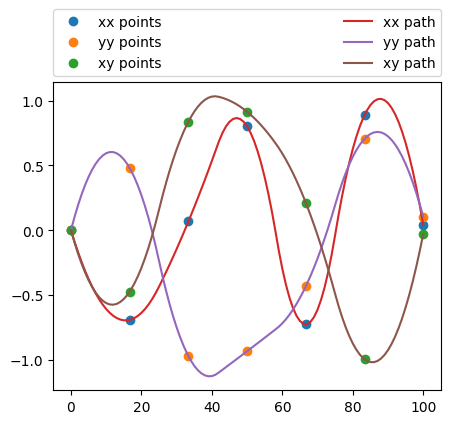

In [3]:
# initialize the strain path generator
strain_path_generator = StrainPathSampler(seed=12, num_dim=3)
data_2d = strain_path_generator.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic"
)
strain_path_generator.plot_path(iteration=0)

## Task 1 
- $v_{frac} = 0.45$
- $L=0.048$ 
- $R_{mu}=0.01$
- $R_{std}=0.003$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) yield criterion: $\sigma_{y} = 0.5+0.2\exp{(\bar\epsilon)}^{0.4}$
- fiber property \
(1) $E=10{MPa}$\
(2) $v=0.19$ 



In [4]:
simulation_wrapper = PnasRVE()
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.45, 
                                    radius_mu=0.01,
                                    radius_std=0.004, 
                                    E_fiber=10,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    num_cpu=6,
                                    print_info=True) 


Micro-structure file will not be updated 

Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.01, 'radius_std': 0.004}
vol_req is: 0.45
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.62519145104504

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.46  is 0.00 s


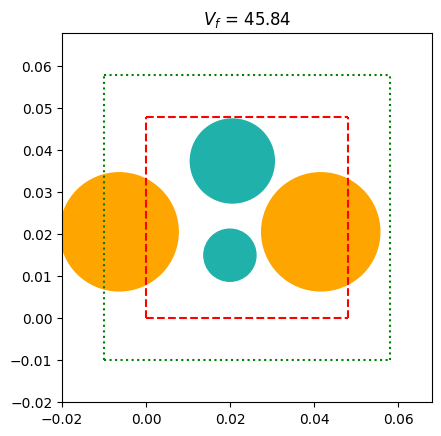

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/tasks_test/modify_yield_criterion/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<22 out of 30 licenses remain available>.


simulation time :40.007023 s
simulation time :60.019077 s
simulation time :80.019116 s
simulation time :100.019125 s
simulation time :120.019173 s
simulation time :140.019190 s
simulation time :160.019202 s
simulation time :180.019274 s
simulation time :200.019329 s
simulation time :220.019363 s
simulation time :240.019400 s
simulation time :260.019446 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 280.07910442352295
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<20 out of 30 licenses remain available>.


In [5]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_1.pickle') 

## Task 2

- $v_{frac} = 0.15$
- $L=0.048$ 
- $R_{mu}=0.0012$
- $R_{std}=0.0002$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) yield criterion: $\sigma_{y} =1.0 +0.2\exp{(\bar\epsilon)}^{0.4}$
- fiber property\
(1) $E=1 {MPa}$\
(2) $v=0.19$ 


In [8]:

simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.15, 
                                    radius_mu=0.0012,
                                    radius_std=0.0002, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    yield_factor_1=1.0,
                                    num_cpu=6,
                                    update_micro_structure=True,
                                    print_info=True)

Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.0012, 'radius_std': 0.0002}
vol_req is: 0.15
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[1.0, 1.0316978638492222, 1.0418255821036508, 1.0491901897169873, 1.0551891864584486, 1.0603417633654517, 1.0649068444639842, 1.0690349813196016, 1.0728225681210433, 1.0763355781923636, 1.0796214341106996, 1.082715532455801, 1.085645094733533, 1.088431570225637, 1.0910922039712734, 1.0936410984009242, 1.0960899547185146, 1.0984486044506367, 1.1007253992982464, 1.1029275027715475, 1.1050611121761507, 1.1071316302061533, 1.1091437994192215, 1.1111018089314695, 1.1130093800197907, 1.1148698354997035, 1.116686156474797, 1.1184610291500892, 1.1201968837498333, 1.121895927103817, 1.1235601701134823, 1.1251914510450485, 1.126791455396889, 1.128361732935587, 

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.03 s


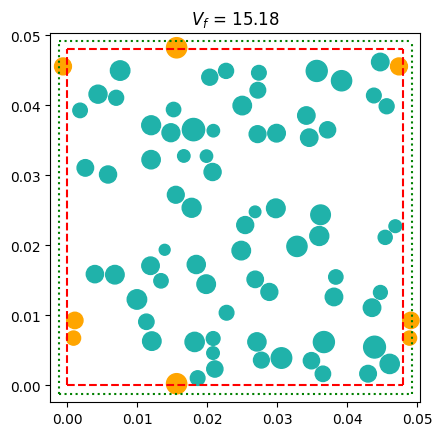

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/tasks_test/modify_yield_criterion/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


simulation time :40.007805 s
simulation time :60.019934 s
simulation time :80.020088 s
simulation time :100.019954 s
simulation time :120.019984 s
simulation time :140.020020 s
simulation time :160.020034 s
simulation time :180.020061 s
simulation time :200.020087 s
simulation time :220.020346 s
simulation time :240.020127 s
simulation time :260.020175 s
simulation time :280.020232 s
simulation time :300.020222 s
simulation time :320.020231 s
simulation time :340.020741 s
simulation time :360.020485 s
simulation time :380.020468 s
simulation time :400.020289 s
simulation time :420.020804 s
simulation time :440.021570 s
simulation time :460.020744 s
simulation time :480.020685 s
simulation time :500.020778 s
simulation time :520.020768 s
simulation time :540.020845 s
simulation time :560.020658 s
simulation time :580.020869 s
simulation time :600.020883 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)


*** ABAQUS/ABQcaeK rank 0 termi

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.


In [9]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_2.pickle')

## Task 3

- $v_{frac} = 0.3$
- $L=0.048$ 
- $R_{mu}=0.003$
- $R_{std}=0$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) yield criterion: $\sigma_{y} = 0.5+0.2\exp{(\bar\epsilon)}^{0.4}$
- fiber property \  
(1) $E=100{MPa}$\
(2) $v=0.19$ 

In [10]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.30, 
                                    radius_mu=0.003,
                                    radius_std=0, 
                                    E_fiber=100,
                                    E_matrix=100,
                                    num_cpu=6,
                                    update_micro_structure=True,
                                    print_info=True)

Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6

remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.02 s


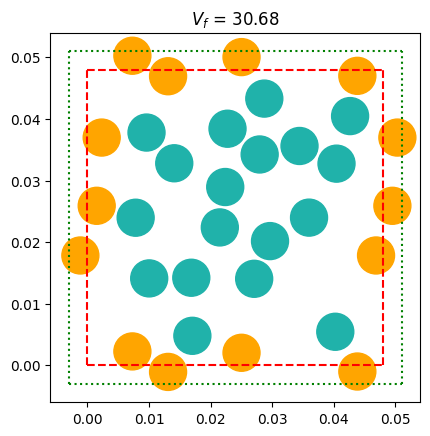

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/tasks_test/modify_yield_criterion/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


simulation time :40.009825 s
simulation time :60.020200 s
simulation time :80.019957 s
simulation time :100.020005 s
simulation time :120.020063 s
simulation time :140.020204 s
simulation time :160.020139 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 180.08362889289856
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


In [11]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_3.pickle')

# plot all results together 

In [12]:
os.getcwd()

'/home/jiaxiangyi/Documents/rvesimulator/examples/tasks_test/modify_yield_criterion/Data'

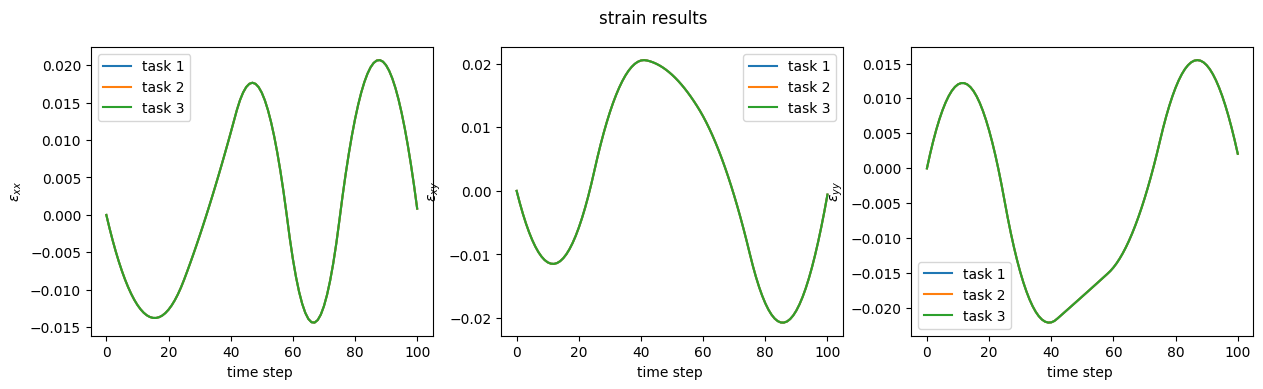

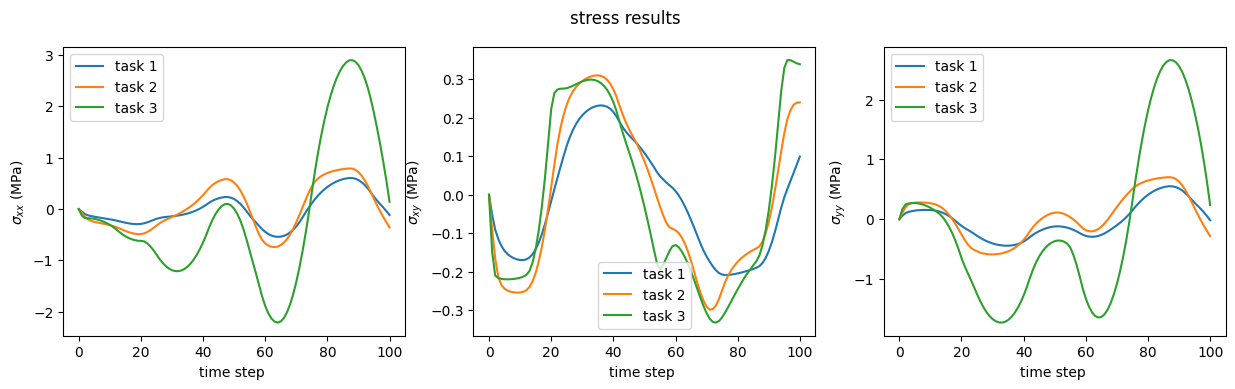

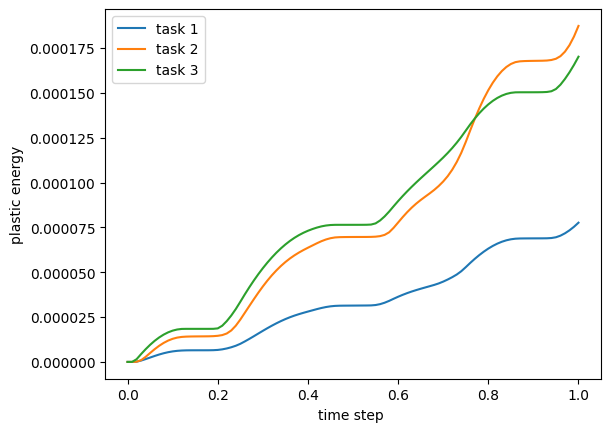

In [16]:
# os.chdir('Data/')
with open("task_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
# with open("task_4.pickle", "rb") as fd:
#     benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
# results_4 =benchmark_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# # result of benchmark4
# stress_4 = results_4["stress"].iloc[0]
# strain_4 = results_4["strain"].iloc[0]
# plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(1,3, figsize=(15,3.75))
ax[0].plot(strain_1[:, 0, 0], label="task 1") 
ax[0].plot(strain_2[:, 0, 0], label="task 2") 
ax[0].plot(strain_3[:, 0, 0], label="task 3") 
# ax[0].plot(strain_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="task 1")
ax[1].plot(strain_2[:, 0, 1], label="task 2")
ax[1].plot(strain_3[:, 0, 1], label="task 3")
# ax[1].plot(strain_4[:, 0, 1], label="task 3")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="task 1") 
ax[2].plot(strain_2[:, 1, 1], label="task 2") 
ax[2].plot(strain_3[:, 1, 1], label="task 3") 
# ax[2].plot(strain_4[:, 1, 1], label="task 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(1,3, figsize=(15,3.75))
ax[0].plot(stress_1[:, 0, 0], label="task 1") 
ax[0].plot(stress_2[:, 0, 0], label="task 2") 
ax[0].plot(stress_3[:, 0, 0], label="task 3") 
# ax[0].plot(stress_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="task 1")
ax[1].plot(stress_2[:, 1, 0], label="task 2")
ax[1].plot(stress_3[:, 1, 0], label="task 3")
# ax[1].plot(stress_4[:, 1, 0], label="task 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="task 1") 
ax[2].plot(stress_2[:, 1, 1], label="task 2") 
ax[2].plot(stress_3[:, 1, 1], label="task 3") 
# ax[2].plot(stress_4[:, 1, 1], label="task 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="task 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="task 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="task 3") 
# ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="task 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)